# Proyek Akhir Belajar Analisis Data dengan Pyhton (Bike Sharing)
- **Nama:** Raihan Muhammad Rafi
- **Email:** [raihanmuhammad3073@gmail.com]
- **ID Dicoding: ggraihan

## Menentukan Pertanyaan Bisnis

- What is the comparison of the number of bike renters with casual status and bike renters with registered status in each month?
- Does windspeed level influence the usage of bike rentals?

## Melakukan Import Pada Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

## Melakukan Data Wrangling

### Gathering Data

In [2]:
import pandas as pd

day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')


### Assessing Data

In [6]:
# Melakukan Pemeriksaan terhadap Missing data
print("Missing values in day data :")
print(day_df.isnull().sum())

print("\nMissing values in hour data :")
print(hour_df.isnull().sum())

# Melakukan Pemeriksaan terhadap Duplicated data
print("\nDuplicated rows in day data :")
print(day_df.duplicated().sum())

print("\nDuplicated rows in hour data :")
print(hour_df.duplicated().sum())



Missing values in day data :
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in hour data :
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicated rows in day data :
0

Duplicated rows in hour data :
0


### Cleaning Data

In [7]:
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)

# Melakukan Metode Imputasi
for column in day_df.select_dtypes(include=['float64', 'int64']).columns:
    day_df[column].fillna(day_df[column].median(), inplace=True)

for column in hour_df.select_dtypes(include=['float64', 'int64']).columns:
    hour_df[column].fillna(hour_df[column].median(), inplace=True)

# Melakukan Metode Interpolasi
day_df.interpolate(method='linear', inplace=True)
hour_df.interpolate(method='linear', inplace=True)

print(day_df.info())
print(hour_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

C:\Users\Raihan\AppData\Local\Temp\ipykernel_16528\337507134.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df[column].fillna(day_df[column].median(), inplace=True)
C:\Users\Raihan\AppData\Local\Temp\ipykernel_16528\337507134.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

## Melakukan Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Dengan asumsi DataFrame `day_df` dan `hour_df`

# Melakukan filtering pada kolom numerik saja untuk day_df
numeric_columns_day = day_df.select_dtypes(include=['int', 'float']).columns
day_df_numeric = day_df[numeric_columns_day]

# Menampilkan statistik day_df secara deskriptif
print(day_df_numeric.describe())

# Melakukan filtering pada kolom numerik saja untuk hour_df
numeric_columns_hour = hour_df.select_dtypes(include=['int', 'float']).columns
hour_df_numeric = hour_df[numeric_columns_hour]

# Menampilkan statistik hour_df secara deksriptif 
print(hour_df_numeric.describe())

# Menghitung korelasi untuk day_df
correlation_matrix_day = day_df_numeric.corr()

# Menampilkan matriks korelasi untuk day_df
print(correlation_matrix_day)

# Menghitung korelasi untuk hour_df
correlation_matrix_hour = hour_df_numeric.corr()

# Menampilkan matriks korelasi untuk hour_df
print(correlation_matrix_hour)


          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

## Visualization & Explanatory Analysis

### What is the comparison of the number of bike renters with casual status and bike renters with registered status in each month?

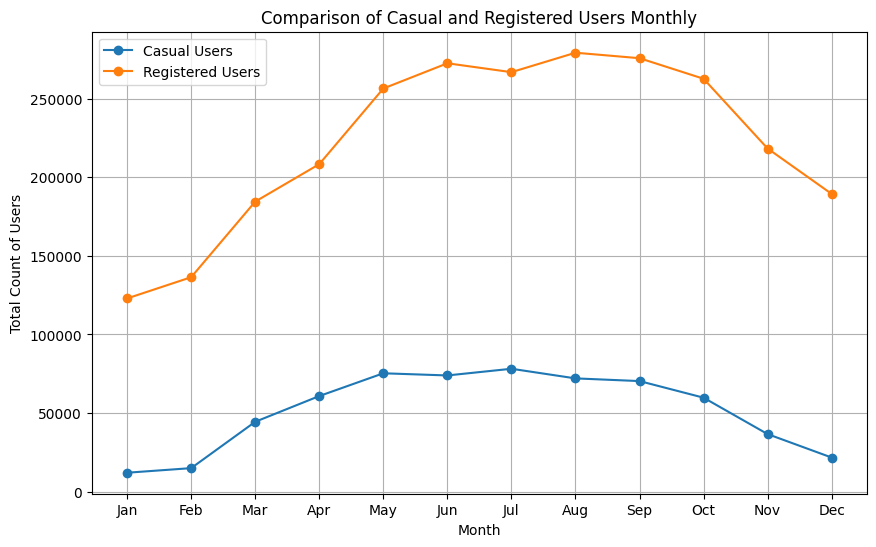

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan day_df adalah DataFrame yang berisi data Anda

# Mengonversi kolom 'dteday' ke dalam tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menambahkan kolom bulan
day_df['month'] = day_df['dteday'].dt.month

# Mengelompokkan data berdasarkan bulan dan menghitung total pengguna casual dan terdaftar tiap bulan
monthly_data = day_df.groupby('month')[['casual', 'registered']].sum()

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['casual'], label='Casual Users', marker='o')
plt.plot(monthly_data.index, monthly_data['registered'], label='Registered Users', marker='o')
plt.title('Comparison of Casual and Registered Users Monthly')
plt.xlabel('Month')
plt.ylabel('Total Count of Users')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2: Does windspeed affect the number of bike rentals

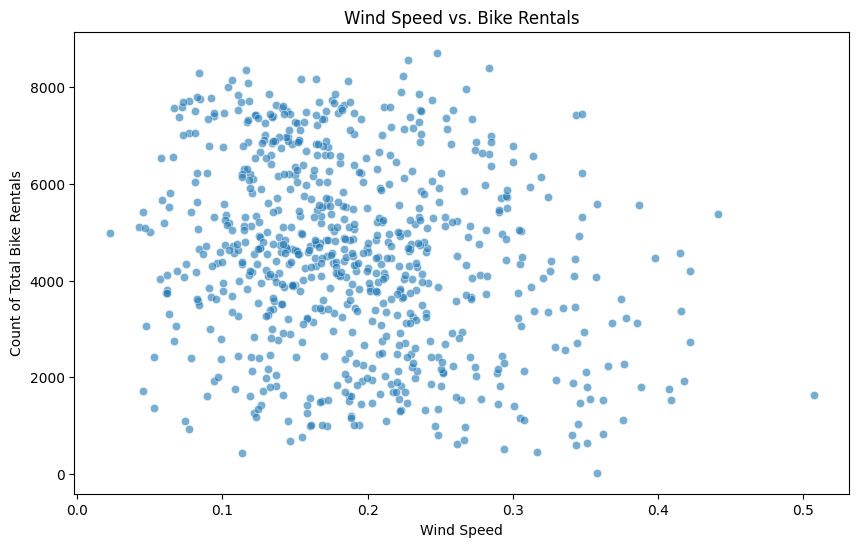

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Membuat Grafik
sns.scatterplot(x='windspeed', y='cnt', data=day_df, alpha=0.6)
plt.title('Wind Speed vs. Bike Rentals')
plt.xlabel('Wind Speed')
plt.ylabel('Count of Total Bike Rentals')
plt.show()




## Conclusion

1. The conclusion of question 1 is that the number of registered bike renters is always higher than casual bike renters. However, towards the end of the year, there is a decreasing trend in the number of both casual and registered renters.
2. The conclusion of question 2 is that wind speed affects the number of bike renters. The higher the wind speed, the fewer bike renters there are.

